In [2]:
# Usual Libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import random

# Libraries for feature extraction
import librosa as lr
import librosa.display

# Libraries for audio playing
import IPython.display as ipd

# Libraries for normalization and dimensionality reduction
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

# Libraries for splitting data
from sklearn.model_selection import train_test_split

# Libraries for model building and training
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Libraries for model evaluation
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn import tree

# Libraries for saving models
import pickle

### Data visualization


#### 2D representation of the soundwaves


In [ ]:
jazz_sample_path = 'dataset/genres_original/jazz/jazz.00020.wav'
jazz_sample, sr = librosa.load(jazz_sample_path)
plt.figure(figsize=(14, 5))
librosa.display.waveshow(jazz_sample, sr=sr)
plt.title('Waveplot for Jazz Music 20')
plt.ylabel('Amplitude')
plt.xlabel('Time (s)')
print("Jazz Music 20")
display(ipd.Audio(jazz_sample_path))

pop_sample_path = "dataset/genres_original/pop/pop.00020.wav"
pop_sample, sr = librosa.load(pop_sample_path)
plt.figure(figsize=(14, 5))
librosa.display.waveshow(pop_sample, sr=sr)
plt.title("Waveplot for Pop Music 20")
plt.ylabel("Amplitude")
plt.xlabel("Time (s)")
print("Pop Music 20")
display(ipd.Audio(pop_sample_path))

rock_sample_path = "dataset/genres_original/rock/rock.00020.wav"
rock_sample, sr = librosa.load(rock_sample_path)
plt.figure(figsize=(14, 5))
librosa.display.waveshow(rock_sample, sr=sr)
plt.title("Waveplot for Rock Music 20")
plt.ylabel("Amplitude")
plt.xlabel("Time (s)")
print("Rock Music 20")
display(ipd.Audio(rock_sample_path))

#### Mel-frequency cepstral coefficients (MFCCs)

In [ ]:
jazz_mfccs = librosa.feature.mfcc(y=jazz_sample, sr=sr)
jazz_mfccs_normalized = librosa.util.normalize(jazz_mfccs, axis=1)
plt.figure(figsize=(14, 5))
librosa.display.specshow(jazz_mfccs_normalized, x_axis='time')
plt.colorbar()
plt.title('MFCC for Jazz Music 20') 
plt.ylabel('MFCC Coefficients')

pop_mfccs = librosa.feature.mfcc(y=pop_sample, sr=sr)
pop_mfccs_normalized = librosa.util.normalize(pop_mfccs, axis=1)
plt.figure(figsize=(14, 5))
librosa.display.specshow(pop_mfccs_normalized, x_axis='time')
plt.colorbar()
plt.title('MFCC for Pop Music 20')
plt.ylabel('MFCC Coefficients')

rock_mfccs = librosa.feature.mfcc(y=rock_sample, sr=sr)
rock_mfccs_normalized = librosa.util.normalize(rock_mfccs, axis=1)
plt.figure(figsize=(14, 5))
librosa.display.specshow(rock_mfccs_normalized, x_axis='time')
plt.colorbar()
plt.title('MFCC for Rock Music 20')
plt.ylabel('MFCC Coefficients')

#### Spectral features

In [ ]:
jazz_centroid = librosa.feature.spectral_centroid(y=jazz_sample, sr=sr)[0]
jazz_frames = range(len(jazz_centroid))
jazz_t = librosa.frames_to_time(jazz_frames, sr=sr)
plt.figure(figsize=(14, 5))
plt.plot(jazz_t, jazz_centroid, color='b')
plt.title('Spectral Centroid for Jazz Music 20')

pop_centroid = librosa.feature.spectral_centroid(y=pop_sample, sr=sr)[0]
pop_frames = range(len(pop_centroid))
pop_t = librosa.frames_to_time(pop_frames, sr=sr)
plt.figure(figsize=(14, 5))
plt.plot(pop_t, pop_centroid, color='b')
plt.title('Spectral Centroid for Pop Music 20')

rock_centroid = librosa.feature.spectral_centroid(y=rock_sample, sr=sr)[0]
rock_frames = range(len(rock_centroid))
rock_t = librosa.frames_to_time(rock_frames, sr=sr)
plt.figure(figsize=(14, 5))
plt.plot(rock_t, rock_centroid, color='b')
plt.title('Spectral Centroid for Rock Music 20')


In [ ]:
jazz_bandwidth = librosa.feature.spectral_bandwidth(y=jazz_sample, sr=sr)[0]
plt.figure(figsize=(14, 5))
plt.plot(jazz_t, jazz_bandwidth, color='g')
plt.title('Spectral Bandwidth for Jazz Music 20')

pop_bandwidth = librosa.feature.spectral_bandwidth(y=pop_sample, sr=sr)[0]
plt.figure(figsize=(14, 5))
plt.plot(pop_t, pop_bandwidth, color='g')
plt.title('Spectral Bandwidth for Pop Music 20')

rock_bandwidth = librosa.feature.spectral_bandwidth(y=rock_sample, sr=sr)[0]
plt.figure(figsize=(14, 5))
plt.plot(rock_t, rock_bandwidth, color='g')
plt.title('Spectral Bandwidth for Rock Music 20')

In [ ]:
jazz_rolloff = librosa.feature.spectral_rolloff(y=jazz_sample, sr=sr)[0]
plt.figure(figsize=(14, 5))
plt.plot(jazz_t, jazz_rolloff, color='r')
plt.title('Spectral Rolloff for Jazz Music 20')

pop_rolloff = librosa.feature.spectral_rolloff(y=pop_sample, sr=sr)[0]
plt.figure(figsize=(14, 5))
plt.plot(pop_t, pop_rolloff, color='r')
plt.title('Spectral Rolloff for Pop Music 20')

rock_rolloff = librosa.feature.spectral_rolloff(y=rock_sample, sr=sr)[0]
plt.figure(figsize=(14, 5))
plt.plot(rock_t, rock_rolloff, color='r')
plt.title('Spectral Rolloff for Rock Music 20')

In [ ]:
zero_crossings_jazz = librosa.feature.zero_crossing_rate(jazz_sample)[0]
total_crossings_jazz = sum(zero_crossings_jazz)

zero_crossings_pop = librosa.feature.zero_crossing_rate(pop_sample)[0]
total_crossings_pop = sum(zero_crossings_pop)

zero_crossings_rock = librosa.feature.zero_crossing_rate(rock_sample)[0]
total_crossings_rock = sum(zero_crossings_rock)

genres = ['Jazz', 'Pop', 'Rock']
total_crossings = [total_crossings_jazz, total_crossings_pop, total_crossings_rock]

plt.figure(figsize=(14, 5))
plt.bar(genres, total_crossings, color=['blue', 'green', 'red'])
plt.title('Total Zero Crossing Rate for Different Genres')
plt.xlabel('Genre')
plt.ylabel('Total Zero Crossing Rate')

#### Rhythmic features

In [ ]:
jazz_tempo, _ = librosa.beat.beat_track(y=jazz_sample, sr=sr)
pop_tempo, _ = librosa.beat.beat_track(y=pop_sample, sr=sr)
rock_tempo, _ = librosa.beat.beat_track(y=rock_sample, sr=sr)

jazz_tempo_val = (np.mean(jazz_tempo))
pop_tempo_val = np.mean(pop_tempo)
rock_tempo_val = np.mean(rock_tempo)

print(f"Jazz Tempo: {round(jazz_tempo_val)} BPM")
print(f"Pop Tempo: {round(pop_tempo_val)} BPM")
print(f"Rock Tempo: {round(rock_tempo_val)} BPM")

#### Chroma features

In [ ]:
jazz_chroma = librosa.feature.chroma_stft(y=jazz_sample, sr=sr)
plt.figure(figsize=(14, 5))
librosa.display.specshow(jazz_chroma, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Chromagram for Jazz Music 20')

pop_chroma = librosa.feature.chroma_stft(y=pop_sample, sr=sr)
plt.figure(figsize=(14, 5))
librosa.display.specshow(pop_chroma, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Chromagram for Pop Music 20')

rock_chroma = librosa.feature.chroma_stft(y=rock_sample, sr=sr)
plt.figure(figsize=(14, 5))
librosa.display.specshow(rock_chroma, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Chromagram for Rock Music 20')

#### Harmonic and precussive features

In [ ]:
jazz_harmony = librosa.effects.harmonic(y=jazz_sample)
jazz_percussive = librosa.effects.percussive(y=jazz_sample)
plt.figure(figsize=(14, 5))
plt.plot(jazz_harmony, color='b')
plt.plot(jazz_percussive, color='r')
plt.title('Harmonic and Percussive for Jazz Music 20')

pop_harmony = librosa.effects.harmonic(y=pop_sample)
pop_percussive = librosa.effects.percussive(y=pop_sample)
plt.figure(figsize=(14, 5))
plt.plot(pop_harmony, color='b')
plt.plot(pop_percussive, color='r')
plt.title('Harmonic and Percussive for Pop Music 20')

rock_harmony = librosa.effects.harmonic(y=rock_sample)
rock_percussive = librosa.effects.percussive(y=rock_sample)
plt.figure(figsize=(14, 5))
plt.plot(rock_harmony, color='b')
plt.plot(rock_percussive, color='r')
plt.title('Harmonic and Percussive for Rock Music 20')

### Data preprocessing

In [3]:
music_data = pd.read_csv('dataset/features_3_sec.csv')
music_data.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [4]:
music_data.isnull().sum()

filename                   0
length                     0
chroma_stft_mean           0
chroma_stft_var            0
rms_mean                   0
rms_var                    0
spectral_centroid_mean     0
spectral_centroid_var      0
spectral_bandwidth_mean    0
spectral_bandwidth_var     0
rolloff_mean               0
rolloff_var                0
zero_crossing_rate_mean    0
zero_crossing_rate_var     0
harmony_mean               0
harmony_var                0
perceptr_mean              0
perceptr_var               0
tempo                      0
mfcc1_mean                 0
mfcc1_var                  0
mfcc2_mean                 0
mfcc2_var                  0
mfcc3_mean                 0
mfcc3_var                  0
mfcc4_mean                 0
mfcc4_var                  0
mfcc5_mean                 0
mfcc5_var                  0
mfcc6_mean                 0
mfcc6_var                  0
mfcc7_mean                 0
mfcc7_var                  0
mfcc8_mean                 0
mfcc8_var     

#### Correlation matrix
We will create a correlation matrix to identify the relationships between the features. This will help us understand how the features are related to each other and which features are most relevant for genre classification.
Observations:
- The diagonal of the correlation matrix shows the correlation of each feature with itself, which is always 1.
- The correlation matrix is symmetric, as the correlation between two features is the same regardless of the order.
- The first group of features (chroma_stft, rmse, spectral_centroid, spectral_bandwidth, rolloff, zero_crossing_rate) are positively correlated with each other.
- The second group of features (mfcc1 to mfcc20) show an interesting pattern where the adjacent features are highly correlated with each other.
- there is a noticeable negative correlation between the mfcc2 and the first group of features.

Text(0.5, 1.0, 'Correlation between the features')

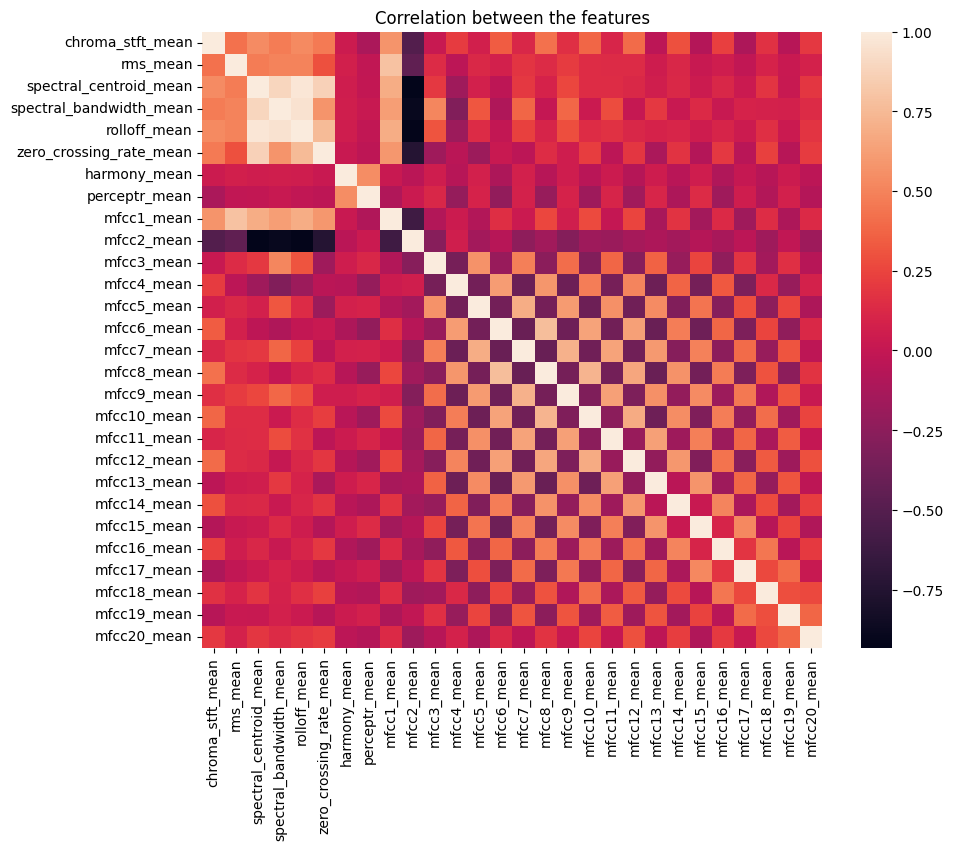

In [5]:
spike_cols = [col for col in music_data.columns if 'mean' in col]
corr = music_data[spike_cols].corr()
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, ax=ax)
plt.title('Correlation between the features')

#### Principal component analysis (PCA)


0.33597697184228537
57


Text(0, 0.5, 'Principal Component 2')

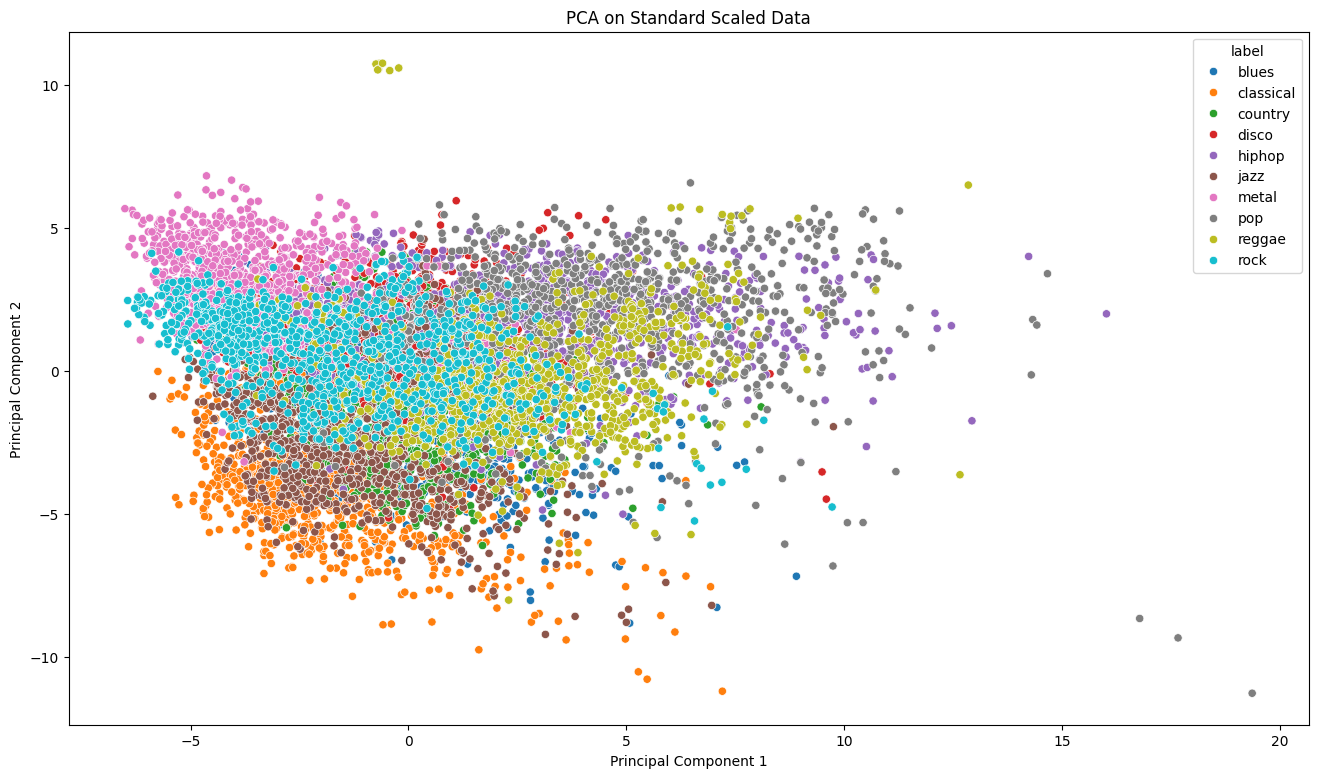

In [6]:
raw_data = music_data.drop(['filename', 'length', 'label'], axis=1)
label = music_data['label']

standard_scaler = StandardScaler()
scaled_data = standard_scaler.fit_transform(raw_data)
df_scaled_data = pd.DataFrame(scaled_data, columns=raw_data.columns)

random_state = 42

pca = PCA(n_components=2, random_state=random_state)
pca_scaled_data = pca.fit_transform(df_scaled_data)
print(pca.explained_variance_ratio_.sum())
print(pca.n_features_in_)
pca_df_scaled_data = pd.DataFrame(data=pca_scaled_data, columns=['PC1', 'PC2'])
final_df = pd.concat([pca_df_scaled_data, label], axis=1)

plt.figure(figsize=(16, 9))
sns.scatterplot(x='PC1', y='PC2', data=final_df, hue = 'label')
plt.title('PCA on Standard Scaled Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

#### Testing, training and validation sets

In [7]:
X_train, X_temp, y_train, y_temp = train_test_split(
    df_scaled_data, label, test_size=0.2, random_state=random_state
)

X_test, X_val, y_test, y_val = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=random_state
    )

print(f"Dataset: {len(df_scaled_data)}")
print(f"Training set: {len(X_train)} ({round(len(X_train)/len(df_scaled_data)*100)}%)")
print(f"Testing set: {len(X_test)} ({round(len(X_test)/len(df_scaled_data)*100)}%)")
print(f"Validation set: {len(X_val)} ({round(len(X_val)/len(df_scaled_data)*100)}%)")

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
y_val_encoded = label_encoder.transform(y_val)
true_labels = label_encoder.classes_
print("True Labels: ", true_labels)

Dataset: 9990
Training set: 7992 (80%)
Testing set: 999 (10%)
Validation set: 999 (10%)
True Labels:  ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']


### Model training

#### Logistic Regression

In [ ]:
max_epochs = 200

logistic_regression = LogisticRegression(max_iter=max_epochs, random_state=random_state, solver='lbfgs')
logistic_regression.fit(X_train, y_train_encoded)

train_pred = logistic_regression.predict(X_train)
val_pred = logistic_regression.predict(X_val)
test_pred = logistic_regression.predict(X_test)

train_accuracy = accuracy_score(y_train_encoded, train_pred)
val_accuracy = accuracy_score(y_val_encoded, val_pred)
test_accuracy = accuracy_score(y_test_encoded, test_pred)

print(f"Accuracy on Training Set: {round(train_accuracy * 100, 2)}%")
print(f"Accuracy on Validation Set: {round(val_accuracy * 100, 2)}%")
print(f"Accuracy on Testing Set: {round(test_accuracy * 100, 2)}%")

print(f"Aantal iteraties per klasse: {logistic_regression.n_iter_}")

conf_matrix = confusion_matrix(y_test_encoded, test_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=true_labels, yticklabels=true_labels)
plt.title('Confusion Matrix Testing set')
plt.xlabel('Predicted')
plt.ylabel('Actual')

#### Stochastic Gradient Descent Classifier

The Stochastic Gradient Descent classifier serves as a robust tool for linear classification. It optimizes model parameters through iterative updates, moving along the steepest gradient of a chosen loss function. A random mini-batches is used from the training data for each update, which enhances computational efficiency, especially for real-time learning and handling large datasets.

To mitigate overfitting, the model uses L2 regularization (Ridge regression). In our case we used a fixed learning rate of 0.01. The SGD classifier is capable of handling multi-class classification by extending its binary classification methodology via the one-vs-all (OvA) strategy.

The primary objective of the SGD classifier is to determine the optimal decision boundary, or hyperplane, that effectively separates data points belonging to different classes within the feature space. This is achieved by iteratively adjusting the model’s parameters to minimize a cost function, often the cross-entropy loss, through the stochastic gradient descent optimization process.


In [ ]:
max_epochs = 200
learning_rate = 0.01

sgd_classifier = SGDClassifier(max_iter=max_epochs, random_state=random_state, learning_rate='constant', eta0=learning_rate)

training_scores = []
validation_scores = []
testing_scores = []
epochs = []

for epoch in range(1, max_epochs + 1):
    sgd_classifier.partial_fit(X_train, y_train_encoded, classes=np.unique(y_train_encoded))
    train_score = sgd_classifier.score(X_train, y_train_encoded)
    val_score = sgd_classifier.score(X_val, y_val_encoded)
    test_score = sgd_classifier.score(X_test, y_test_encoded)
    training_scores.append(train_score)
    validation_scores.append(val_score)
    testing_scores.append(test_score)
    epochs.append(epoch)

    if epoch % 10 == 0:
        print(f"Epoch {epoch}: Train accuracy = {train_score:.4f}, Validation accuracy = {val_score:.4f}, Test accuracy = {test_score:.4f}")

train_accuracy = accuracy_score(y_train_encoded, sgd_classifier.predict(X_train))
val_accuracy = accuracy_score(y_val_encoded, sgd_classifier.predict(X_val))
test_accuracy = accuracy_score(y_test_encoded, sgd_classifier.predict(X_test))

print(f"Accuracy on Training Set: {round(train_accuracy * 100, 2)}%")
print(f"Accuracy on Validation Set: {round(val_accuracy * 100, 2)}%")
print(f"Accuracy on Testing Set: {round(test_accuracy * 100, 2)}%")

conf_matrix = confusion_matrix(y_test_encoded, sgd_classifier.predict(X_test))
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=true_labels, yticklabels=true_labels)
plt.title('Confusion Matrix Testing set')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.figure(figsize=(14, 7))
plt.plot(epochs, training_scores, label='Training Accuracy')
plt.plot(epochs, validation_scores, label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

#### Random Forest

Random forests is an ensemble method where each tree is built using a bootstrap sample from the training set. When splitting nodes, the best split is chosen either from all features or a random subset of features. This randomness helps reduce the variance of the model, as individual decision trees tend to overfit. By averaging the predictions of multiple trees, random forests achieve better performance despite potentially increasing bias slightly. It's widely used for classification and regression tasks, leveraging the "wisdom of the crowd" approach where diverse models collaborate for better predictions.

We tuned a Random Forest model by testing different numbers of trees (from 1 to 100, in steps of 5) with a maximum depth of 10. The depth is set to 10 so the model doesn't overfit on the data. As we add more trees to the forest, the variance of the model decreases and the model becomes more stable. After a certain point however, adding more trees has diminishing returs.

Each tree makes its own prediction, and the final output is the majority vote (classification) or average (regression) from all trees. This approach leverages the "wisdom of the crowd," where the combined knowledge of many models improves the overall prediction accuracy compared to a single decision tree.


In [ ]:
max_depth = 10
n_estimators = 100
tree_count = list(range(1, n_estimators + 1, 5))
training_scores = []
val_scores = []
testing_scores = []

for trees in tree_count:
    random_forest = RandomForestClassifier(n_estimators=trees, max_depth=max_depth, random_state=0)
    random_forest.fit(X_train, y_train_encoded)
    train_score = random_forest.score(X_train, y_train_encoded)
    val_score = random_forest.score(X_val, y_val_encoded)
    test_score = random_forest.score(X_test, y_test_encoded)

    training_scores.append(train_score)
    val_scores.append(val_score)
    testing_scores.append(test_score)

    if trees % 10 == 1:
        print(f" {trees} trees: Train accuracy = {training_scores[-1]:.4f}, Validation accuracy = {val_scores[-1]:.4f}, Test accuracy = {testing_scores[-1]:.4f}")

max_estimators = tree_count[np.argmax(val_scores)]
print(f"Optimal number of trees: {max_estimators}")

random_forest = RandomForestClassifier(n_estimators=max_estimators, max_depth=max_depth, random_state=random_state)
random_forest.fit(X_train, y_train_encoded)

train_accuracy = accuracy_score(y_train_encoded, random_forest.predict(X_train))
val_accuracy = accuracy_score(y_val_encoded, random_forest.predict(X_val))
test_accuracy = accuracy_score(y_test_encoded, random_forest.predict(X_test))

print(f"Accuracy on Training Set: {round(train_accuracy * 100, 2)}%")
print(f"Accuracy on Validation Set: {round(val_accuracy * 100, 2)}%")
print(f"Accuracy on Testing Set: {round(test_accuracy * 100, 2)}%")

conf_matrix = confusion_matrix(y_test_encoded, random_forest.predict(X_test))
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=true_labels, yticklabels=true_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.figure(figsize=(14, 7))
plt.plot(tree_count, training_scores, label="Training Accuracy")
plt.plot(tree_count, val_scores, label="Validation Accuracy")
plt.title("Accuracy vs Number of Trees in Random Forest")
plt.xlabel("Number of Trees")
plt.ylabel("Accuracy")
plt.legend()

#### Support Vector Machine

A Support Vector Machine model can be used for both regression and classification tasks, but it's particularly effective for classification. The primary objective of an SVM is to identify the optimal hyperplane that separates data points of different classes in an N-dimensional space, maximizing the margin between these classes. The hyperplane is defined by support vectors, which are the data points closest to the hyperplane and critical in defining its position and orientation.

SVMs can handle non-linearly separable data by employing kernel functions, which transform the input space into higher dimensions where a linear separation is possible. We are going to use the Radial Basis Function (RBF) kernel, which is commonly used in SVMs for its flexibility in capturing complex relationships in the data. The RBF kernel has two parameters that are critical for model performance: C and gamma. The parameter C controls the trade-off between misclassification of training examples and smoothness of the decision surface, while gamma defines the influence of a single training example on the decision boundary.

The SVM model will use the C-Support Vector Classification (SVC) implementation from Scikit-learn, which supports multiclass classification by implementing the "one-against-one" approach. This strategy trains a binary classifier for each pair of classes and combines their predictions to determine the final class label. 

In [ ]:
param_grid = {
    'C': [0.1, 0.2, 0.5, 1, 2, 5, 10, 20, 50, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'],
}

grid_search = GridSearchCV(SVC(random_state=random_state), param_grid, cv=10)
grid_search.fit(X_train, y_train_encoded)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

svm_model = grid_search.best_estimator_

print(f"The final model is a SVM model with C = {grid_search.best_params_['C']} and kernel = {grid_search.best_params_['kernel']}")
print(f"The score of the model on the trained data is {round(svm_model.score(X_train, y_train_encoded)*100,2)}")
print(f"The score of the model on the validation data is {round(svm_model.score(X_val, y_val_encoded)*100,2)}")
print(f"The score of the model on the test data is {round(svm_model.score(X_test, y_test_encoded)*100,2)}")

conf_matrix = confusion_matrix(y_test_encoded, svm_model.predict(X_test))
plt.figure(figsize=(10, 8))
sns.heatmap(
    conf_matrix, annot=True, fmt="d", xticklabels=true_labels, yticklabels=true_labels
)
plt.title("Confusion Matrix for SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")

training_scores = []
val_scores = []

for C in param_grid['C']:
    svm = SVC(C=C, kernel=grid_search.best_params_['kernel'], random_state=random_state)
    svm.fit(X_train, y_train_encoded)
    training_scores.append(svm.score(X_train, y_train_encoded))
    val_scores.append(svm.score(X_val, y_val_encoded))

plt.figure(figsize=(14, 7))
plt.plot(param_grid['C'], training_scores, label="Training Accuracy")
plt.plot(param_grid['C'], val_scores, label="Validation Accuracy")
plt.title("Accuracy vs C Parameter in SVM")
plt.xlabel("C Parameter")
plt.ylabel("Accuracy")
plt.legend()

svm_rmse = -cross_val_score(svm_model, X_train, y_train_encoded, cv=10, scoring='neg_mean_squared_error')
pd.Series(svm_rmse).describe()
print(f"Mean RMSE: {svm_rmse.mean()}")
print(f"Standard Deviation of RMSE: {svm_rmse.std()}")
print(f"Minimum RMSE: {svm_rmse.min()}")
print(f"Maximum RMSE: {svm_rmse.max()}")
print(f"RMSE for each fold: {svm_rmse}")

#### K-Nearest Neighbors

The K-Nearest Neighbors (KNN) algorithm is a simple, instance-based learning method used for classification and regression tasks. It classifies new data points based on the majority class among their 'k' nearest neighbors in the feature space. The algorithm does not explicitly learn a model but stores all training data and makes predictions by comparing new data points to existing ones.

Choosing the optimal 'k' value is crucial for KNN performance. A small 'k' makes the model sensitive to noise and outliers, potentially leading to overfitting. On the other hand, a large 'k' may smooth decision boundaries and overlook local patterns, resulting in underfitting. We choose to use the Elbow Method to determine the optimal 'k' value by analyzing the bias-variance tradeoff. The weights of the neighbors is set to distance, meaning closer neighbors have a higher influence on the prediction. This can help the model capture local patterns more effectively.

The KNN algorithm is computationally expensive, especially for large datasets, as it requires calculating the distance between the new data point and all training examples. To optimize neighbor searches, we could use data structures like KD Trees and Ball Trees. 

In [ ]:
max_neighbors = 20
k_values = list(range(1, max_neighbors + 1))
weights = 'distance'

training_scores = []
val_scores = []
testing_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, weights=weights)
    knn.fit(X_train, y_train_encoded)
    train_score = knn.score(X_train, y_train_encoded)
    val_score = knn.score(X_val, y_val_encoded)
    test_score = knn.score(X_test, y_test_encoded)

    training_scores.append(train_score)
    val_scores.append(val_score)
    testing_scores.append(test_score)

    if k % 2 == 0:
        print(f"K = {k}: Train accuracy = {train_score:.4f}, Validation accuracy = {val_score:.4f}, Test accuracy = {test_score:.4f}")
    
best_k = 6
print(f"Best K: {best_k}")

knn = KNeighborsClassifier(n_neighbors=best_k, weights=weights)
knn.fit(X_train, y_train_encoded)

train_accuracy = accuracy_score(y_train_encoded, knn.predict(X_train))
val_accuracy = accuracy_score(y_val_encoded, knn.predict(X_val))
test_accuracy = accuracy_score(y_test_encoded, knn.predict(X_test))

print(f"Accuracy on Training Set: {round(train_accuracy * 100, 2)}%")
print(f"Accuracy on Validation Set: {round(val_accuracy * 100, 2)}%")
print(f"Accuracy on Testing Set: {round(test_accuracy * 100, 2)}%")

conf_matrix = confusion_matrix(y_test_encoded, knn.predict(X_test))
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=true_labels, yticklabels=true_labels)
plt.title('Confusion Matrix for KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.figure(figsize=(14, 7))
plt.plot(k_values, val_scores, marker='o')
plt.title('Validation Accuracy vs Number of Neighbors')
plt.xlabel('Number of Neighbors')
plt.ylabel('Validation Accuracy')
plt.grid(True)

#### Decission Tree

The Decision Tree algorithm is a versatile and interpretable method used for classification and regression tasks. It partitions the feature space into regions based on the values of input features, creating a tree-like structure where internal nodes represent decisions based on feature values and leaf nodes represent the target variable. The algorithm recursively splits the data based on feature thresholds to maximize information gain or minimize impurity, aiming to create homogeneous regions that predict the target variable accurately.

Decision Trees are prone to overfitting, especially when the tree depth is not constrained. To prevent overfitting, we can set the max depth of the tree, limit the number of samples required to split an internal node, or set the minimum number of samples required to be at a leaf node. Pruning techniques like cost-complexity pruning can also help simplify the tree structure and improve generalization to new data.

The Decision Tree algorithm is intuitive and easy to interpret, making it suitable for understanding feature importance and decision-making processes. It can handle both numerical and categorical data, and it's robust to outliers and missing values. However, it may struggle with capturing complex relationships in the data and can be sensitive to small variations in the training set.

In [ ]:
criteria = "entropy"
max_depth = [5, 10, 15, 20, 25]
class_weight = 'balanced'

training_scores = []
val_scores = []
testing_scores = []

for depth in max_depth:
    decision_tree = DecisionTreeClassifier(criterion=criteria, max_depth=depth, class_weight=class_weight, random_state=random_state)
    decision_tree.fit(X_train, y_train_encoded)
    train_score = decision_tree.score(X_train, y_train_encoded)
    val_score = decision_tree.score(X_val, y_val_encoded)
    test_score = decision_tree.score(X_test, y_test_encoded)

    training_scores.append(train_score)
    val_scores.append(val_score)
    testing_scores.append(test_score)

    print(f"Max Depth = {depth}: Train accuracy = {train_score:.4f}, Validation accuracy = {val_score:.4f}, Test accuracy = {test_score:.4f}")

best_depth = max_depth[np.argmax(val_scores)]
print(f"Best Max Depth: {best_depth}")

decision_tree = DecisionTreeClassifier(criterion=criteria, max_depth=best_depth, class_weight=class_weight, random_state=random_state)
decision_tree.fit(X_train, y_train_encoded)

train_accuracy = accuracy_score(y_train_encoded, decision_tree.predict(X_train))
val_accuracy = accuracy_score(y_val_encoded, decision_tree.predict(X_val))
test_accuracy = accuracy_score(y_test_encoded, decision_tree.predict(X_test))

print(f"Accuracy on Training Set: {round(train_accuracy * 100, 2)}%")
print(f"Accuracy on Validation Set: {round(val_accuracy * 100, 2)}%")
print(f"Accuracy on Testing Set: {round(test_accuracy * 100, 2)}%")

conf_matrix = confusion_matrix(y_test_encoded, decision_tree.predict(X_test))
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=true_labels, yticklabels=true_labels)
plt.title('Confusion Matrix for Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')


#### Gradient Boosting

In [ ]:
loss = "log_loss"
learning_rate = 0.2
n_estimators = 300

gradient_boosting = GradientBoostingClassifier(loss=loss, learning_rate=learning_rate, n_estimators=n_estimators, random_state=random_state)
gradient_boosting.fit(X_train, y_train_encoded)

train_accuracy = accuracy_score(y_train_encoded, gradient_boosting.predict(X_train))
val_accuracy = accuracy_score(y_val_encoded, gradient_boosting.predict(X_val))
test_accuracy = accuracy_score(y_test_encoded, gradient_boosting.predict(X_test))

print(f"Accuracy on Training Set: {round(train_accuracy * 100, 2)}%")
print(f"Accuracy on Validation Set: {round(val_accuracy * 100, 2)}%")
print(f"Accuracy on Testing Set: {round(test_accuracy * 100, 2)}%")

conf_matrix = confusion_matrix(y_test_encoded, gradient_boosting.predict(X_test))
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=true_labels, yticklabels=true_labels)
plt.title('Confusion Matrix for Gradient Boosting')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.figure(figsize=(14, 7))
plt.plot(gradient_boosting.train_score_)
plt.title('Loss over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Loss')


### Choosing the model based on performance



In [ ]:
kernel = 'rbf'
C_value = 10
gamma = 'scale'
final_svm_model = SVC(C=C_value, kernel=kernel, gamma=gamma, random_state=random_state)
final_model = final_svm_model.fit(X_train, y_train_encoded)

print(f"The final model is a SVM model with C = {C_value} and kernel = {kernel}")

print(f"The accuracy of the model on the test data is {round(final_model.score(X_test, y_test_encoded)*100,2)}%")

y_true = y_test_encoded
y_pred = final_model.predict(X_test)
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=true_labels, yticklabels=true_labels)
plt.title('Confusion Matrix for Final SVM Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')

model_filename = 'svm_final_model.sav'
pickle.dump(final_model, open(model_filename, 'wb'))
print(f"Model saved as {model_filename}")

label_filename = 'label_encoder.sav'
pickle.dump(label_encoder, open(label_filename, 'wb'))
print(f"Label Encoder saved as {label_filename}")

scaler_filename = 'standard_scaler.sav'
pickle.dump(standard_scaler, open(scaler_filename, 'wb'))
print(f"Standard Scaler saved as {scaler_filename}")
